# **Libraries**

Import semua library yang dibutuhkan.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import statistics
import scipy.stats
from statistics import NormalDist
from scipy.stats import gaussian_kde
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Data**

Import *dataset nyc-rolling-sales.csv* ke dalam variabel **nyc_property**.

In [3]:
nyc_property = pd.read_csv("nyc-rolling-sales.csv")
nyc_property.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Buat salinan data asli dengan mendefinisikannya sebagai df, sehingga data asli tidak rusak.

In [4]:
df = nyc_property.copy()

# **Pre-processing Data**

Hapus kolom yang tidak relevan.

In [5]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

Mengubah nama kolom menjadi lowercase.

In [6]:
df.columns = df.columns.str.lower()

Mengubah spasi kosong dalam nama kolom menjadi uderscore.

In [7]:
df.columns = df.columns.str.replace(" ","_")

Mengecek tipe data pada setiap kolom.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   borough                         84548 non-null  int64 
 1   neighborhood                    84548 non-null  object
 2   building_class_category         84548 non-null  object
 3   tax_class_at_present            84548 non-null  object
 4   block                           84548 non-null  int64 
 5   lot                             84548 non-null  int64 
 6   ease-ment                       84548 non-null  object
 7   building_class_at_present       84548 non-null  object
 8   address                         84548 non-null  object
 9   apartment_number                84548 non-null  object
 10  zip_code                        84548 non-null  int64 
 11  residential_units               84548 non-null  int64 
 12  commercial_units                84548 non-null

Mengonversi beberapa kolom menjadi tipe data numeric.

In [9]:
numeric = ["residential_units","commercial_units","total_units", "land_square_feet" , "gross_square_feet","sale_price"]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

Mengonversi beberapa kolom menjadi tipe data category.

In [10]:
categorical = ['borough','neighborhood','building_class_category', 'tax_class_at_present', 'building_class_at_present','zip_code', 'year_built', 'building_class_at_time_of_sale', 'tax_class_at_time_of_sale']

for col in categorical: 
    df[col] = df[col].astype("category")

Mengonversi kolom sale_date menjadi tipe data datetime.

In [11]:
df["sale_date"] = pd.to_datetime(df["sale_date"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borough                         84548 non-null  category      
 1   neighborhood                    84548 non-null  category      
 2   building_class_category         84548 non-null  category      
 3   tax_class_at_present            84548 non-null  category      
 4   block                           84548 non-null  int64         
 5   lot                             84548 non-null  int64         
 6   ease-ment                       84548 non-null  object        
 7   building_class_at_present       84548 non-null  category      
 8   address                         84548 non-null  object        
 9   apartment_number                84548 non-null  object        
 10  zip_code                        84548 non-null  category      
 11  re

Ganti nama borough sesuai dengan kode: 
- 1 = Manhattan 
- 2 = Bronx
- 3 = Brooklyn
- 4 = Queens 
- 5 = Staten Island

In [13]:
def renaming_borough(x):
    if x == 1:
        return "Manhattan"
    elif x == 2:
        return "Bronx"
    elif x == 3:
        return "Brooklyn"
    elif x == 4:
        return "Queens"
    else:
        return "Staten Island"
    
df["borough"] = df["borough"].apply(renaming_borough)
df.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


Ganti missing values dengan NaN.

In [14]:
df.replace(' ',np.nan, inplace=True)

Menghitung jumlah nilai missing values.

In [15]:
df.isna().sum()

borough                               0
neighborhood                          0
building_class_category               0
tax_class_at_present                738
block                                 0
lot                                   0
ease-ment                         84548
building_class_at_present           738
address                               0
apartment_number                  65496
zip_code                              0
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                  26252
gross_square_feet                 27612
year_built                            0
tax_class_at_time_of_sale             0
building_class_at_time_of_sale        0
sale_price                        14561
sale_date                             0
dtype: int64

Persentase missing values.

In [16]:
df.isna().sum() /len(df) *100

borough                             0.000000
neighborhood                        0.000000
building_class_category             0.000000
tax_class_at_present                0.872877
block                               0.000000
lot                                 0.000000
ease-ment                         100.000000
building_class_at_present           0.872877
address                             0.000000
apartment_number                   77.466055
zip_code                            0.000000
residential_units                   0.000000
commercial_units                    0.000000
total_units                         0.000000
land_square_feet                   31.049818
gross_square_feet                  32.658372
year_built                          0.000000
tax_class_at_time_of_sale           0.000000
building_class_at_time_of_sale      0.000000
sale_price                         17.222170
sale_date                           0.000000
dtype: float64

Hapus kolom yang tidak relevan.

In [17]:
df = df.drop(["ease-ment","apartment_number", "block", "lot", "address"],axis=1)

Hapus nilai NaN dari kolom tax_class_at_present dan building_class_at_present.

In [18]:
df = df.dropna(subset=["tax_class_at_present","building_class_at_present"])

Ubah nilai NaN dengan 0 pada kolom land_square_feet, gross_square_feet, dan sale_price.

In [19]:
for i in ["land_square_feet","gross_square_feet","sale_price"]:
    df[i] = df[i].fillna(0)

Ambil sale_price yang lebih besar dari 0.

In [20]:
df = df[df["sale_price"] != 0]

Periksa apakah masih terdapat missing values.

In [21]:
df.isna().sum()

borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
building_class_at_present         0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59166 entries, 0 to 84547
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borough                         59166 non-null  category      
 1   neighborhood                    59166 non-null  category      
 2   building_class_category         59166 non-null  category      
 3   tax_class_at_present            59166 non-null  category      
 4   building_class_at_present       59166 non-null  category      
 5   zip_code                        59166 non-null  category      
 6   residential_units               59166 non-null  int64         
 7   commercial_units                59166 non-null  int64         
 8   total_units                     59166 non-null  int64         
 9   land_square_feet                59166 non-null  float64       
 10  gross_square_feet               59166 non-null  float64       
 11  year_bu

In [23]:
df.head()

,borough,neighborhood,building_class_category,tax_class_at_present,building_class_at_present,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,D9,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


Kelompokkan semua sub-kelas ke dalam kelas utama pada kolom building_class_at_present.

In [24]:
df["building_class_at_present"] = df["building_class_at_present"].str[0]
df.head()

,borough,neighborhood,building_class_category,tax_class_at_present,building_class_at_present,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,D,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


Ambil tahun dari kolom sale_date dan tetapkan ke kolom baru bernama sale_year.

In [25]:
df['sale_year'] = pd.DatetimeIndex(df['sale_date']).year

Periksa apakah ada outliers menggunakan box plot dan histogram.

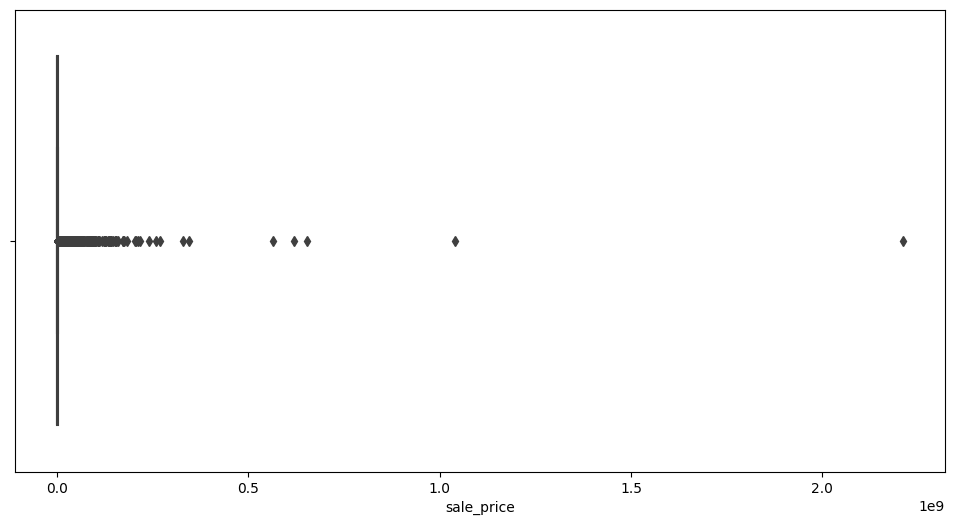

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="sale_price")
plt.show()

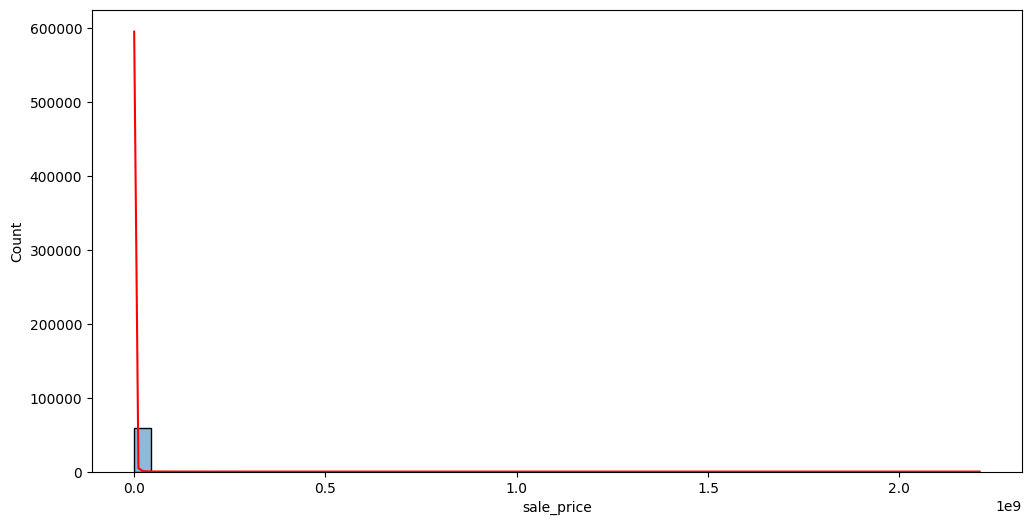

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df['sale_price'], kde=True, bins=50).get_lines()[0].set_color("red")
plt.show()

Terlihat bahwa terdapat banyak sekali outliers sehingga langkah selanjutnya adalah hapus outliers dengan metode Interquartile Range (IQR).

In [28]:
sale_price_q1 = df["sale_price"].quantile(0.25)
sale_price_q3 = df["sale_price"].quantile(0.75)
sale_price_iqr = sale_price_q3 - sale_price_q1

sale_price_lower_limit = sale_price_q1 - (1.5 * sale_price_iqr)
sale_price_upper_limit = sale_price_q3 + (1.5 * sale_price_iqr)

In [29]:
outliers_removed = df[(df["sale_price"] >= sale_price_lower_limit) & (df["sale_price"] <= sale_price_upper_limit)]
outliers_removed.head()

,borough,neighborhood,building_class_category,tax_class_at_present,building_class_at_present,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_year
12,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C,10009,0,0,0,0.0,0.0,1920,2,C6,1.0,2016-09-06,2016
13,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C,10009,0,0,0,0.0,0.0,1920,2,C6,499000.0,2017-03-10,2017
14,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C,10009,0,0,0,0.0,0.0,1920,2,C6,10.0,2017-04-28,2017
15,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C,10009,0,0,0,0.0,0.0,1920,2,C6,529500.0,2017-06-09,2017
16,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C,10009,0,0,0,0.0,0.0,1920,2,C6,423000.0,2017-07-14,2017


Periksa lagi apakah ada outliers menggunakan box plot dan histogram.

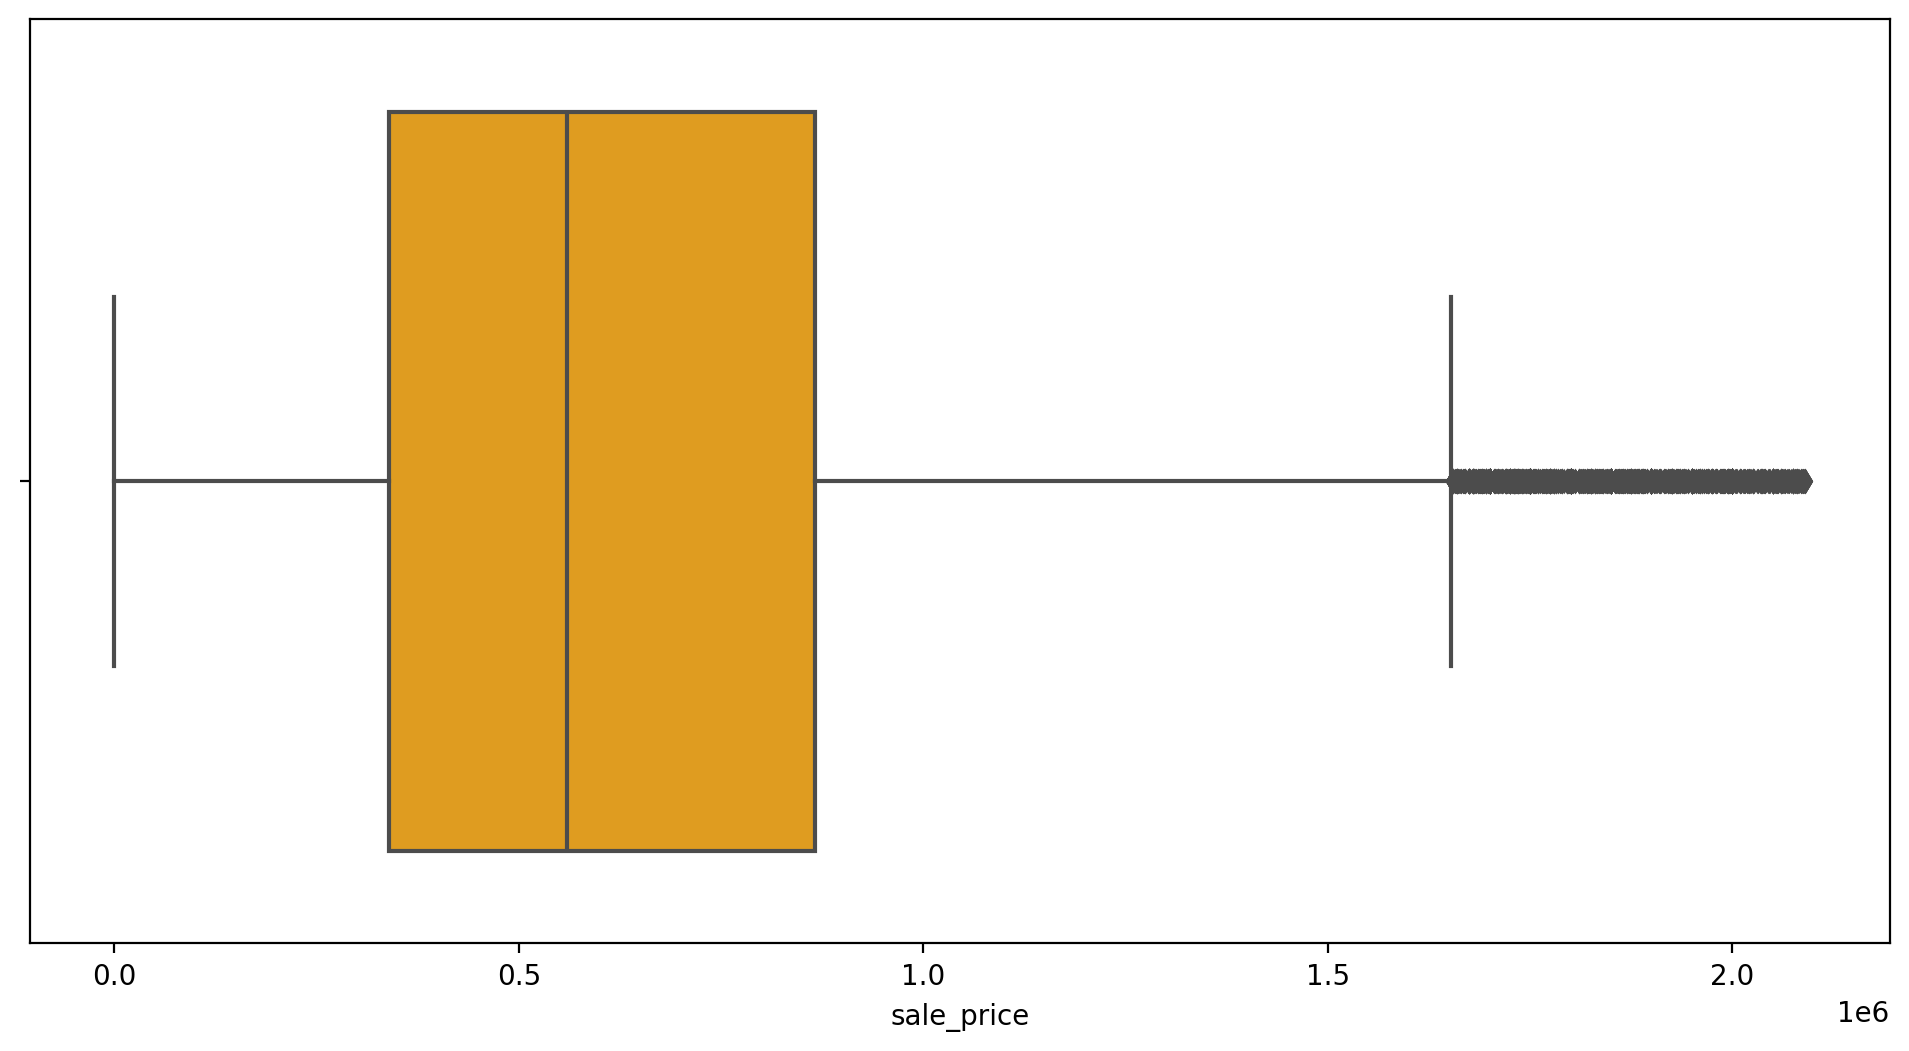

In [30]:
plt.figure(figsize=(12,6),dpi=200)
sns.boxplot(data=outliers_removed,x="sale_price", color="orange")
plt.show()

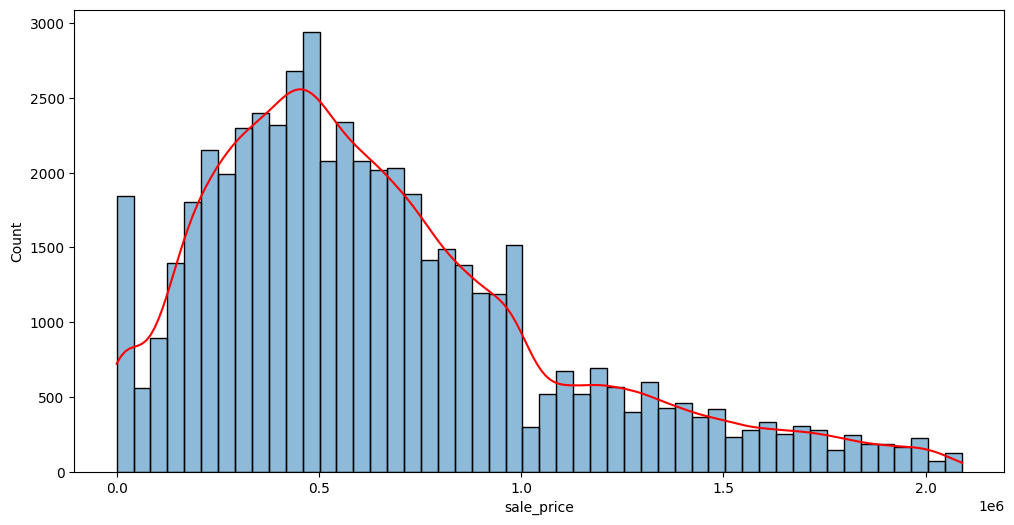

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(outliers_removed['sale_price'], kde=True, bins=50).get_lines()[0].set_color("red")
plt.show()

Karena masih ada banyak outliers, ulangi langkah di atas sebanyak yang diperlukan.

In [32]:
n = 1
limit = 4

while n <= limit:
    sale_price_q1 = outliers_removed["sale_price"].quantile(0.25)
    sale_price_q3 = outliers_removed["sale_price"].quantile(0.75)
    sale_price_iqr = sale_price_q3 - sale_price_q1

    sale_price_lower_limit = sale_price_q1 - (1.5 * sale_price_iqr)
    sale_price_upper_limit = sale_price_q3 + (1.5 * sale_price_iqr)

    outliers_removed = outliers_removed[(outliers_removed["sale_price"] >= sale_price_lower_limit) & (outliers_removed["sale_price"] <= sale_price_upper_limit)]
    
    n += 1

<Axes: xlabel='sale_price'>

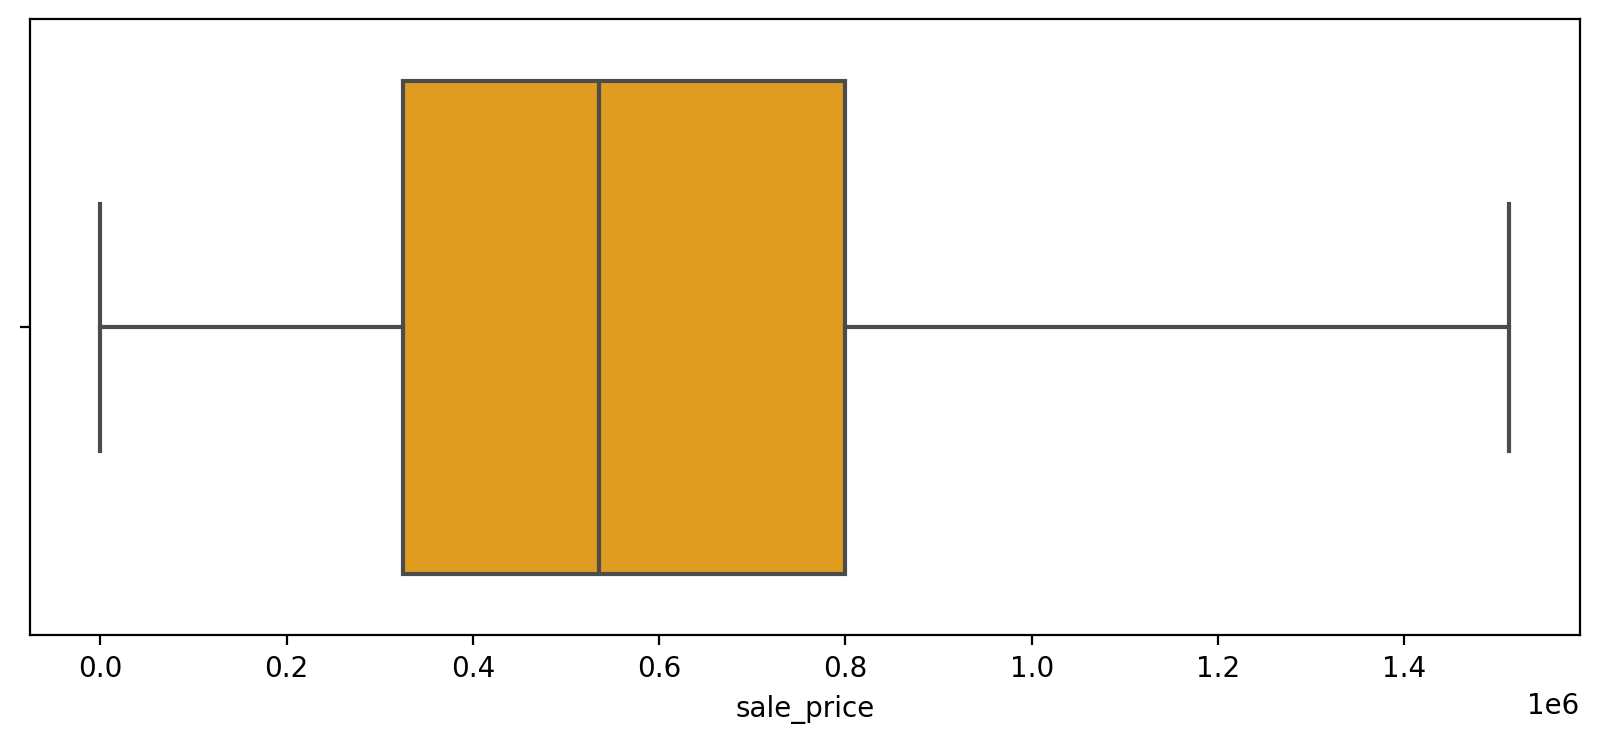

In [33]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=outliers_removed,x="sale_price", color="orange")

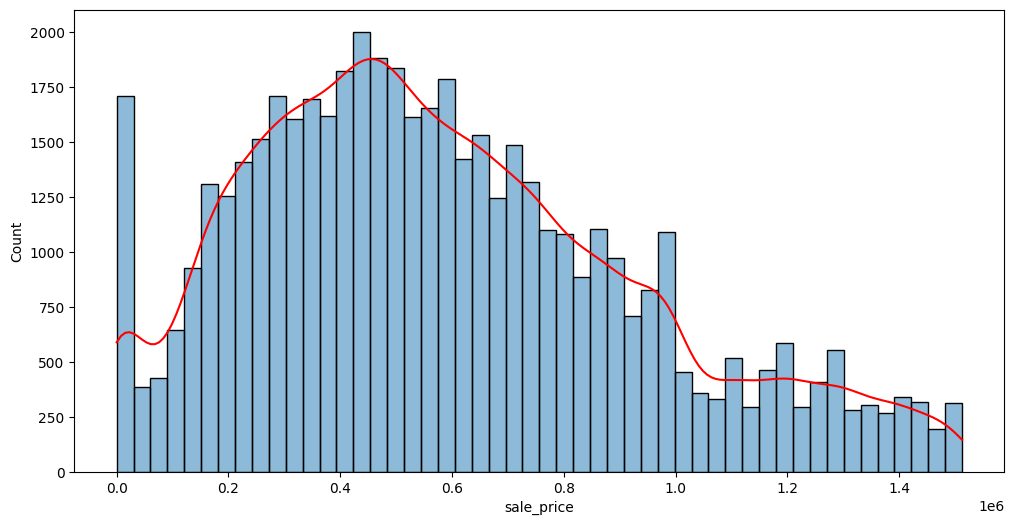

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(outliers_removed['sale_price'], kde=True, bins=50).get_lines()[0].set_color("red")
plt.show()

# **Measures of Central Tendency**

Cari measures of central tendency:
- Mean 
- Median 
- Mode 
- Range 
- Variance
- Standard Deviation

In [35]:
mct = outliers_removed.groupby(['borough','building_class_at_present','sale_year']).agg({"sale_price":[np.mean,
                                                                                                  np.median,
                                                                                                  statistics.mode,
                                                                                                  np.ptp,
                                                                                                  np.var,
                                                                                                  np.std]})
mct = mct.reset_index()
mct.columns = mct.columns.droplevel(-1)
mct.columns = ['borough','building_class_at_present','sale_year','mean','median','mode','range','variance','standard_deviation']
mct = mct.dropna()
mct

,borough,building_class_at_present,sale_year,mean,median,mode,range,variance,standard_deviation
0,Manhattan,A,2016,1.001448e+06,1000000.0,1375000.0,1067758.0,1.909133e+11,436936.253145
1,Manhattan,A,2017,3.021925e+05,36255.0,10.0,1509990.0,2.854313e+11,534257.668432
2,Manhattan,B,2016,1.118125e+06,1230000.0,1310000.0,1012500.0,1.918141e+11,437965.823438
3,Manhattan,B,2017,6.534334e+05,775000.0,1386200.0,1386190.0,2.304694e+11,480072.294912
4,Manhattan,C,2016,5.435901e+05,471000.0,10.0,1505999.0,1.315287e+11,362668.902445
...,...,...,...,...,...,...,...,...,...
219,Staten Island,S,2017,3.959197e+05,402000.0,25000.0,900000.0,5.248968e+10,229106.270267
222,Staten Island,V,2016,3.577857e+05,280000.0,650000.0,1265000.0,1.079070e+11,328492.016367
223,Staten Island,V,2017,3.324611e+05,295292.0,350000.0,1199990.0,7.792322e+10,279147.313163
224,Staten Island,W,2016,1.000000e+00,1.0,1.0,0.0,0.000000e+00,0.000000


Visualisasikan rata-rata dari sale_price pada tahun 2016 dan 2017 dari kategori building_class_at_present di setiap borough.

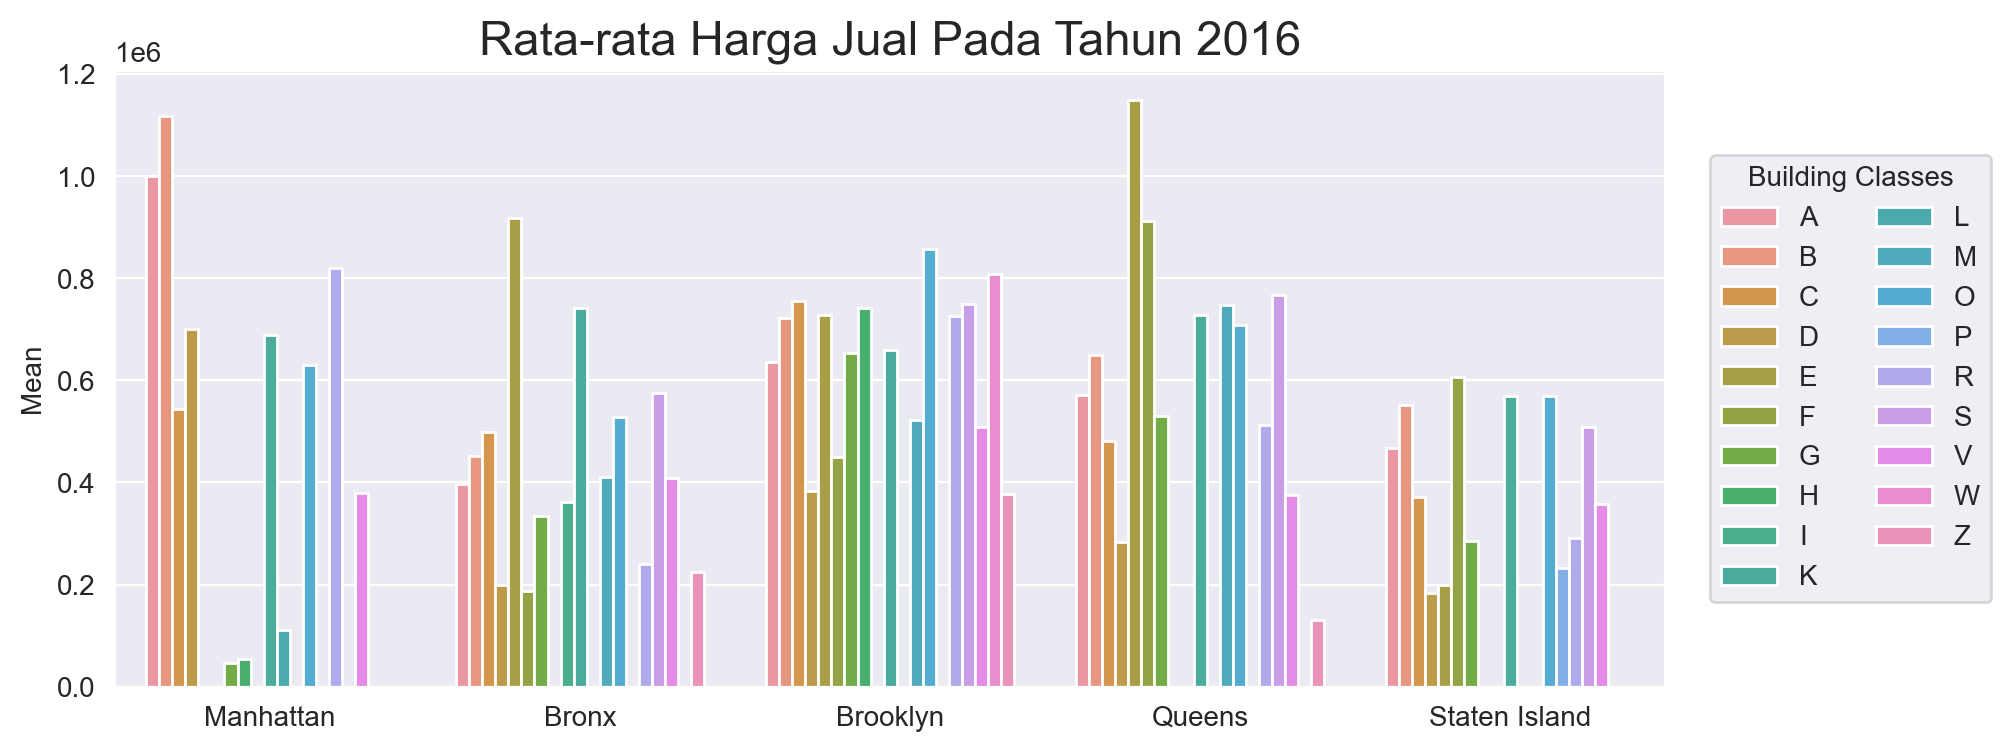

In [36]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,4),dpi=200)
    sns.barplot(data=mct[mct["sale_year"] == 2016],x="borough",y="mean",
                hue="building_class_at_present",errorbar=None,
                hue_order=np.sort(mct["building_class_at_present"].unique()))
    plt.title("Rata-rata Harga Jual Pada Tahun 2016", fontsize=17)
    plt.xlabel("")
    plt.ylabel("Mean")
    plt.legend(bbox_to_anchor=(1.02,0.5),loc="center left",title="Building Classes",ncol=2)
    plt.show()

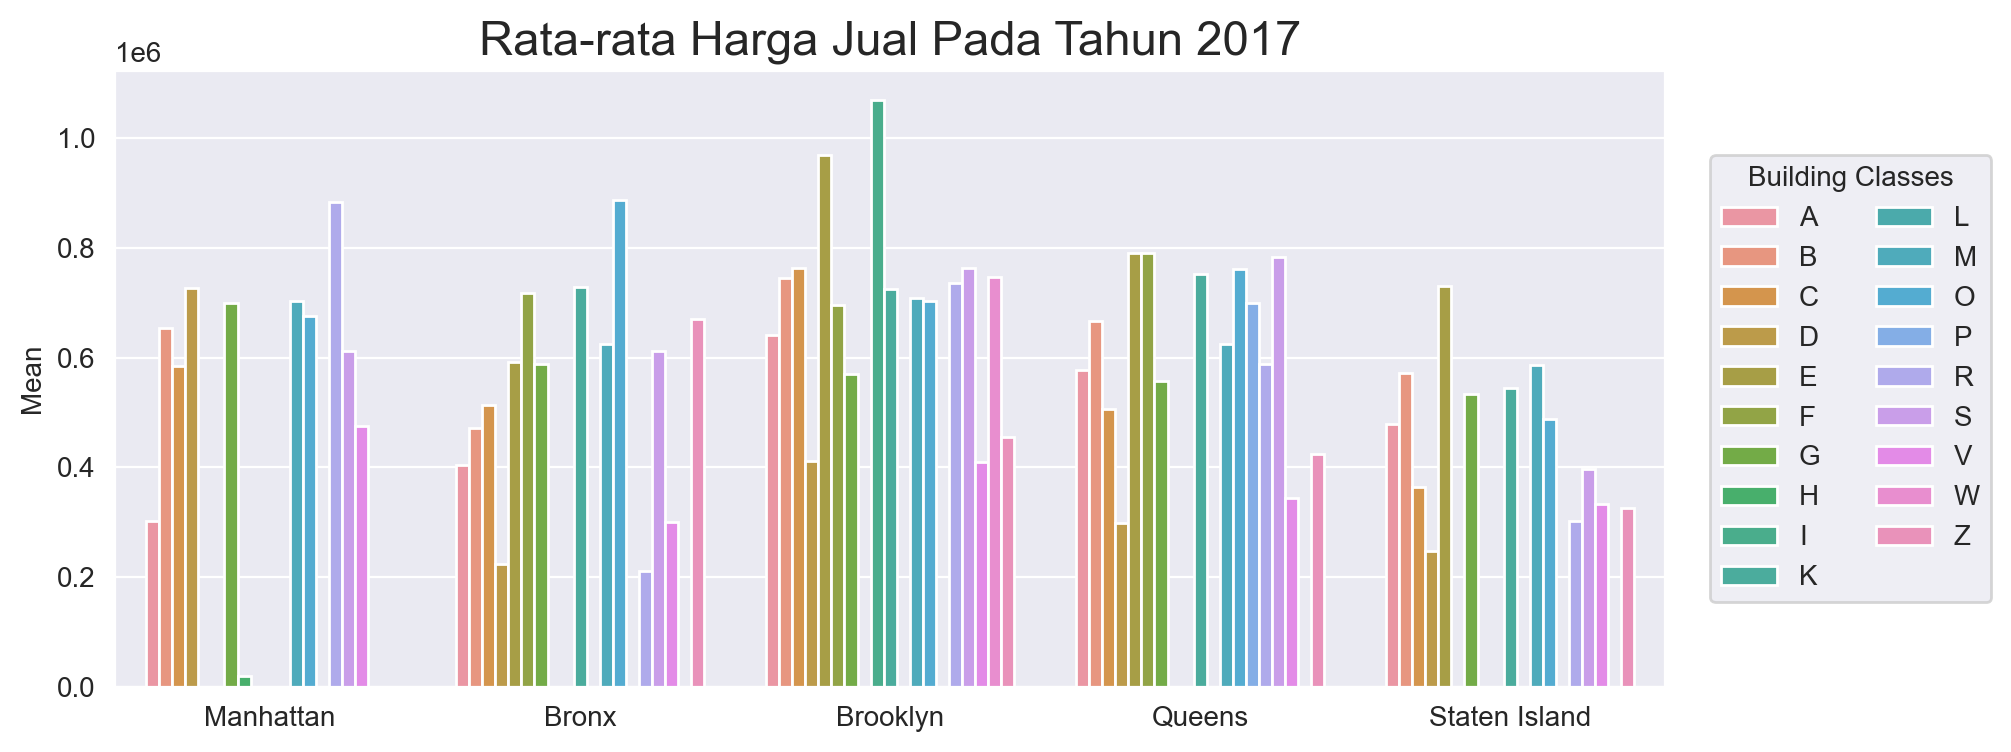

In [37]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,4),dpi=200)
    sns.barplot(data=mct[mct["sale_year"] == 2017],x="borough",y="mean",
                hue="building_class_at_present",errorbar=None,
                hue_order=np.sort(mct["building_class_at_present"].unique()))
    plt.title("Rata-rata Harga Jual Pada Tahun 2017", fontsize=17)
    plt.xlabel("")
    plt.ylabel("Mean")
    plt.legend(bbox_to_anchor=(1.02,0.5),loc="center left",title="Building Classes",ncol=2)
    plt.show()

# **Confidence Intervals of Sample Mean**

Urutkan 5 borough tertinggi berdasarkan rata-rata sale_price dari kategori building_class_at_present pada tahun 2017.

In [38]:
top_5 = mct[mct["sale_year"] == 2017].sort_values("mean",ascending=False).head(5)
top_5

,borough,building_class_at_present,sale_year,mean,median,mode,range,variance,standard_deviation
109,Brooklyn,I,2017,1.070000e+06,1070000.0,975000.0,190000.0,1.805000e+10,134350.288425
101,Brooklyn,E,2017,9.696667e+05,1025000.0,1000000.0,1399000.0,1.799304e+11,424182.064970
73,Bronx,O,2017,8.868223e+05,941756.0,450000.0,960000.0,1.339007e+11,365924.399856
33,Manhattan,R,2017,8.832363e+05,880393.0,10.0,1511185.0,1.208105e+11,347578.078111
147,Queens,E,2017,7.915577e+05,660000.0,1250000.0,1207657.0,1.987972e+11,445866.781702


Potong dataset berdasarkan borough, building_class_at_present, dan sale_year yang memiliki 5 rata-rata tertinggi dalam sale_price. Kemudian buat sebuah array dari sale_price.

In [39]:
temp = []
for i,j,k in zip(top_5["borough"],top_5["building_class_at_present"],top_5["sale_year"]):
    temp.append(outliers_removed[(outliers_removed["borough"] == i) & 
                                 (outliers_removed["building_class_at_present"] == j) &
                                 (outliers_removed["sale_year"] == k)])
top_5_sale_price = pd.concat(temp)
top_5_sale_price = top_5_sale_price["sale_price"]  
top_5_sale_price = np.array(top_5_sale_price)
top_5_sale_price

array([ 975000., 1165000.,  585000., ...,  610000., 1450000.,  660000.])

Ambil 30 sampel secara acak dan hitung nilai rata-ratanya sebanyak 500 kali. Kemudian tambahkan nilai-nilai tersebut ke dalam list bernama sample_means.

In [40]:
np.random.seed(666)
n=30
sample_means = []
for sample in range(0,500):
    sample_values = np.random.choice(a = top_5_sale_price, size = n)
    temp_mean = np.mean(sample_values)
    sample_means.append(temp_mean)
sample_means

[888613.7666666667,
 807629.1,
 883311.9333333333,
 923530.9333333333,
 920661.9666666667,
 788761.3,
 856087.1,
 852268.7666666667,
 1078373.5666666667,
 767286.4333333333,
 845960.8333333334,
 1009893.5,
 936972.6333333333,
 873612.0666666667,
 836087.7333333333,
 926276.1666666666,
 823389.6,
 847586.9,
 877077.5666666667,
 871352.8666666667,
 889976.7666666667,
 994406.1666666666,
 817964.6333333333,
 821582.7666666667,
 953822.6,
 856701.1333333333,
 851214.1666666666,
 763465.3666666667,
 837733.0,
 840284.1333333333,
 867801.8666666667,
 880652.1,
 915726.3,
 848497.7666666667,
 881113.1333333333,
 786585.2333333333,
 982601.7666666667,
 802501.2,
 869929.8,
 780253.3666666667,
 990138.7666666667,
 995206.3333333334,
 831085.8666666667,
 907425.3666666667,
 904751.5666666667,
 690930.9666666667,
 827258.9,
 860369.5333333333,
 855676.2666666667,
 911451.5666666667,
 820766.2333333333,
 899449.8333333334,
 841286.1666666666,
 905504.6333333333,
 852434.3333333334,
 936554.6,
 909

Buat histogram dan dapat dilihat secara visual apakah data terdistribusi normal atau tidak.

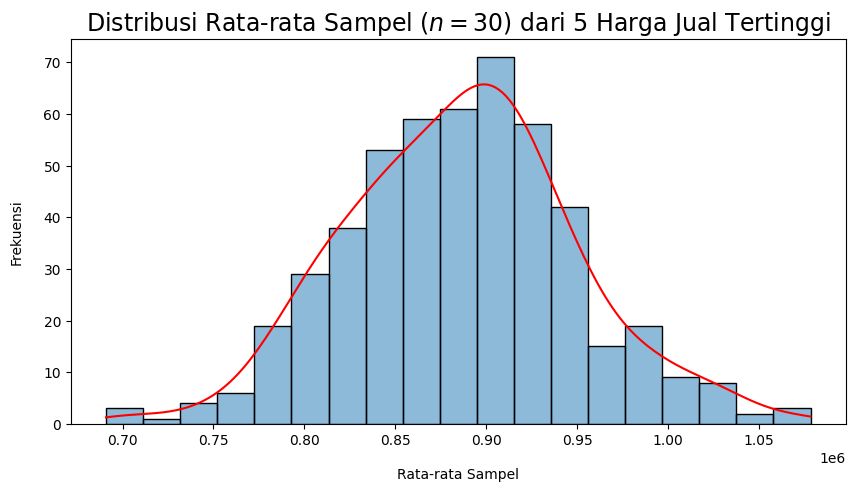

In [41]:
plt.figure(figsize=(10,5),dpi=100)
sns.histplot(data=sample_means,kde=True).get_lines()[0].set_color("red")
plt.title("Distribusi Rata-rata Sampel ($n=30$) dari 5 Harga Jual Tertinggi", fontsize=17)
plt.xlabel("Rata-rata Sampel", labelpad=14)
plt.ylabel("Frekuensi", labelpad=14)
plt.show()

Hitung nilai z-score dengan interval kepercayaan $95\%$. Lalu hitung nilai minimal, maksimal, rata-rata, dan simpangan baku dari sample_means. 

In [42]:
conf = 0.95
z_score = NormalDist().inv_cdf((1 + conf) / 2)
mean_of_sm = np.mean(sample_means)
std_of_sm = np.std(sample_means)
min_of_sm = np.min(sample_means)
max_of_sm = np.max(sample_means)
pd.DataFrame({'Z-Score':z_score,'Mean':mean_of_sm,'Stdev':std_of_sm,'Min':min_of_sm,'Max':max_of_sm},index=[''])

,Z-Score,Mean,Stdev,Min,Max
,1.959964,886011.201867,63116.757498,690930.966667,1.078374e+06


Hitung nilai kesalahan baku dari top_5_sale_price.

In [43]:
se_pop = np.std(top_5_sale_price)/np.sqrt(n)
se_pop

63571.83363577804

Hitung nilai batas bawah dan batas atas dari top_5_sale_price.

In [44]:
lower = mean_of_sm - z_score*se_pop
upper = mean_of_sm + z_score*se_pop
pd.DataFrame({'Lower Limit':lower,'Upper Limit':upper},index=[''])

,Lower Limit,Upper Limit
,761412.697509,1.010610e+06


Visualisasikan interval kepercayaan dari sample_means.

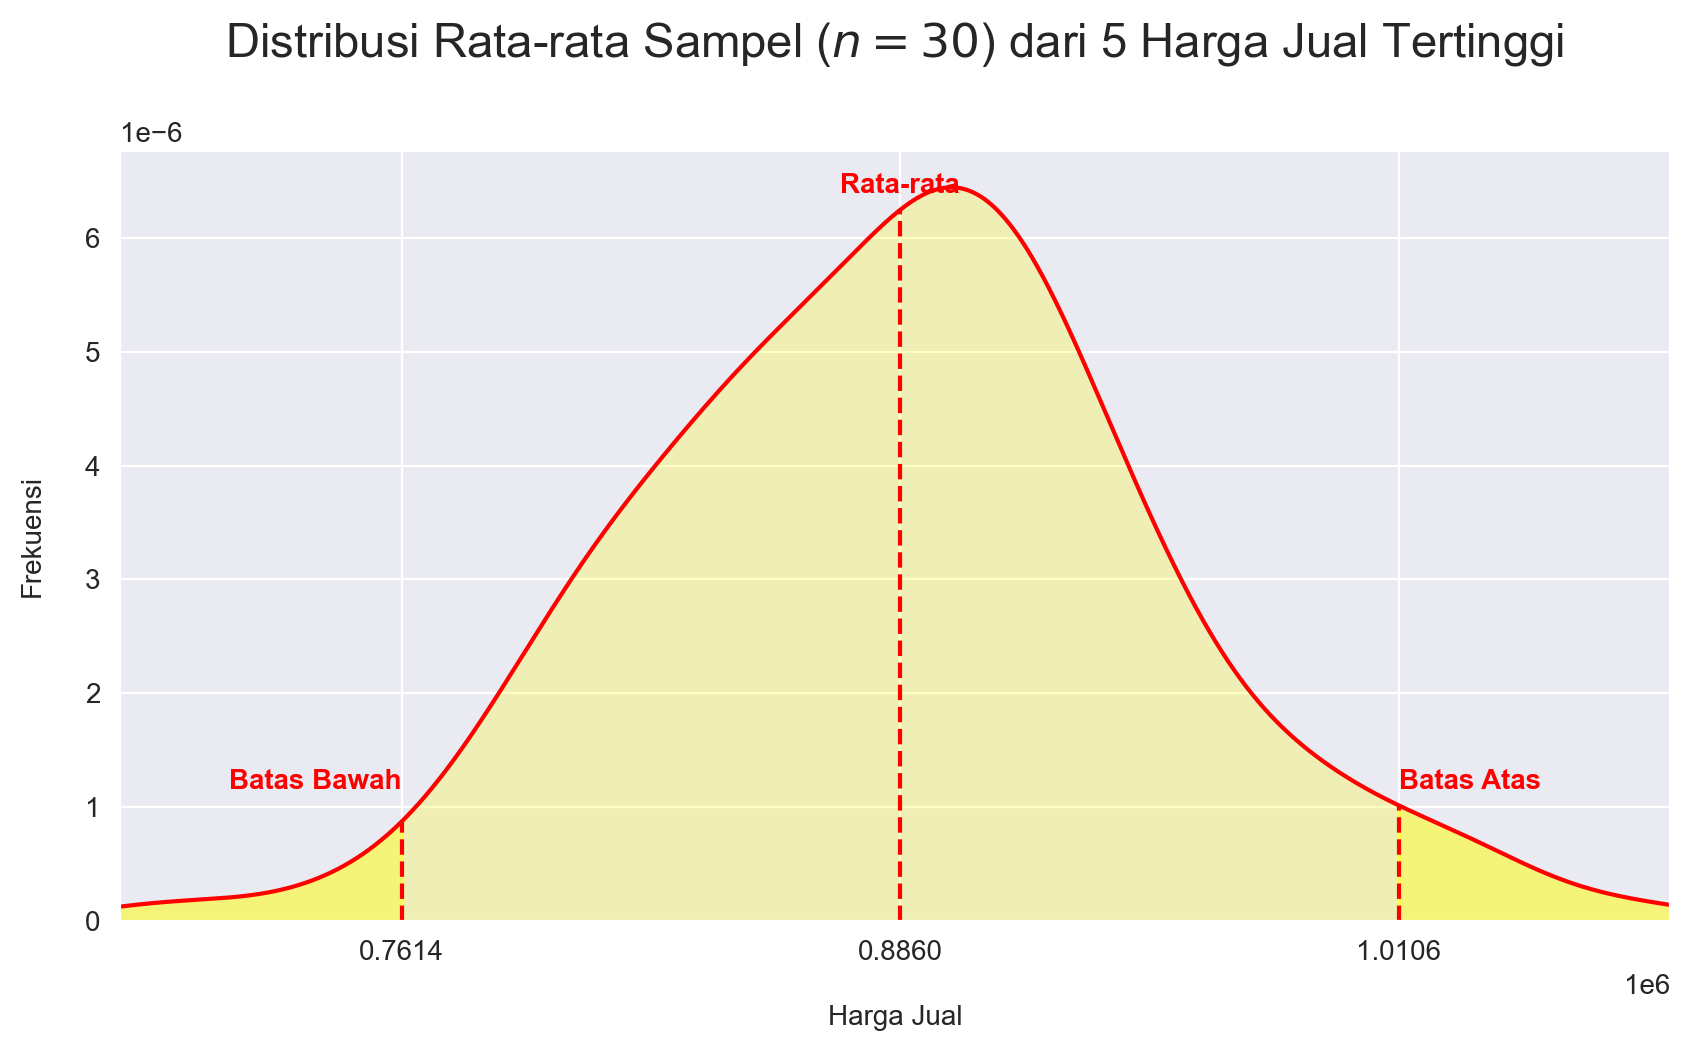

In [45]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,5),dpi=200)
    kde = gaussian_kde(sample_means)
    pos = np.linspace(min_of_sm, max_of_sm, 10000)
    plt.plot(pos, kde(pos), color="red")
    
    shade = np.linspace(lower, upper, 10000)
    plt.fill_between(shade, kde(shade), alpha=0.25, color='yellow')
    
    left = np.linspace(min_of_sm,lower,10_000)
    plt.fill_between(left,kde(left),color="yellow",alpha=0.5)
    
    right = np.linspace(upper,max_of_sm,10_000)
    plt.fill_between(right,kde(right),color="yellow",alpha=0.5)

    [plt.vlines(x=i,ymin=0,ymax=kde(i),color="red",linestyle="--") for i in [lower,mean_of_sm,upper]]

    plt.annotate("Batas Bawah",(lower,kde(upper)),color="red",weight="bold",
                 textcoords="offset points",xytext=(0,6),ha="right")
    plt.annotate("Rata-rata",(mean_of_sm,kde(mean_of_sm)),color="red",weight="bold",
                 textcoords="offset points",xytext=(0,6),ha="center")
    plt.annotate("Batas Atas",(upper,kde(upper)),color="red",weight="bold",
                 textcoords="offset points",xytext=(0,6),ha="left")

    plt.xticks([lower,mean_of_sm,upper])
    plt.xlim(xmin=np.min(sample_means),xmax=np.max(sample_means))
    plt.ylim(ymin=0)
    plt.title("Distribusi Rata-rata Sampel ($n=30$) dari 5 Harga Jual Tertinggi", y=1.1, fontsize=17)
    plt.xlabel("Harga Jual", labelpad=14)
    plt.ylabel("Frekuensi", labelpad=14)
    plt.show()

**Kesimpulan:** Berdasarkan plot tersebut, dapat ditentukan bahwa ada peluang $95\%$ bahwa rata-rata sampel dengan $n = 30$ akan berada di dalam area yang diarsir kuning muda. Dengan demikian, probabilitas bahwa rata-rata sampel dengan $n = 30$ akan berada di luar area yang diarsir kuning muda adalah $100\%-95\%$ atau $5\%$.

# **Anova F-Test for Sale Price in 5 Borough**

### Hipotesis:
- $H_{0}$: $μ_{1}$(Manhattan) = $μ_{2}$(Bronx) = $μ_{3}$(Brooklyn) = $μ_{4}$(Queens) = $μ_{5}$(Staten_Island)
- $H_{1}$: Setidaknya ada satu pasang populasi yang rata-ratanya tidak sama.

### Taraf Signifikansi:
$\alpha=5\%=0.05$

### Statistik Uji:

Lakukan uji anova untuk sale_price pada 5 borough yang ada. Gunakan dua cara untuk melakukan uji anova untuk melihat keakurakatan hasil.

In [46]:
anova = f_oneway(df[df['borough']=='Manhattan']['sale_price'],
                 df[df['borough']=='Bronx']['sale_price'],
                 df[df['borough']=='Brooklyn']['sale_price'],
                 df[df['borough']=='Queens']['sale_price'],
                 df[df['borough']=='Staten Island']['sale_price'])
pd.DataFrame({"F-Statistics":anova[0],"P-Values":anova[1]},index=[""])

,F-Statistics,P-Values
,108.707677,1.816090e-92


In [47]:
model = ols('sale_price ~ borough',data=df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
borough,4.0,6.579737e+16,1.644934e+16,108.707677,1.816090e-92
Residual,59161.0,8.952077e+18,1.513172e+14,NaN,NaN


### Kriteria Penolakan
$H_{0}$ ditolak jika nilai P-Values ≤ $\alpha$

### Kesimpulan
Berdasarkan output di atas, dapat dilihat bahwa nilai P-Values (1.816090e-92) ≤ $\alpha (0.05)$ maka $H_{0}$ ditolak. Sehingga dapat disimpulkan bahwa ada perbedaan rata-rata yang signifikan antara sale_price pada 5 borough.